<a href="https://colab.research.google.com/github/LeticiaSPedroso/preprocessing-examples/blob/master/Preprocessing_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré-Processamento de texto

Dataset: https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis/data


Este dataset contém tweets considerados positivos e negativos em português 

In [0]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import io
import re
import matplotlib.pyplot as plt 



In [0]:
from google.colab import files
uploaded = files.upload()

Saving Train3Classes.csv to Train3Classes.csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['Train3Classes.csv']),error_bad_lines=False, delimiter=';', encoding='latin-1')

In [0]:
df

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, Ã© precisamente o c...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coraÃ§Ã£o do menininho que vc tem. ...,Fri Oct 12 16:28:49 +0000 2018,1,:)
...,...,...,...,...,...
99995,1030468564715794432,Confira esta vaga na Senac-RS: Editor De Video...,Fri Aug 17 14:57:05 +0000 2018,2,#oportunidade
99996,1030468147353210881,Confira esta vaga na Grupo SABEMI: Assistente ...,Fri Aug 17 14:55:26 +0000 2018,2,#oportunidade
99997,1030467484766359552,Confira esta vaga na Groupe LâOCCITANE: Gere...,Fri Aug 17 14:52:48 +0000 2018,2,#oportunidade
99998,1030466921702076416,"EstÃ¡ no ar o CandidatoWEB, seu novo portal de...",Fri Aug 17 14:50:33 +0000 2018,2,#trabalho


Apagamos linhas com valores faltantes, e colunas que não iremos usar

In [0]:
df.dropna()

df = df.drop(columns=["tweet_date","id","query_used"])

In [0]:
df

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, Ã© precisamente o c...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coraÃ§Ã£o do menininho que vc tem. ...,1
...,...,...
99995,Confira esta vaga na Senac-RS: Editor De Video...,2
99996,Confira esta vaga na Grupo SABEMI: Assistente ...,2
99997,Confira esta vaga na Groupe LâOCCITANE: Gere...,2
99998,"EstÃ¡ no ar o CandidatoWEB, seu novo portal de...",2


Retiramos caracteres especiais e números

In [0]:
#df['tweet_text']=df['tweet_text'].replace('[\W|0-9]',' ', regex=True)

In [0]:
df['tweet_text']

0        @Laranjito76 A pessoa certa para isso seria o ...
1        @behin_d_curtain Para mim, Ã© precisamente o c...
2        Vou fazer um video hoje... estou pensando em f...
3        aaaaaaaa amei tanto essas polaroids, nem sei e...
4        Valoriza o coraÃ§Ã£o do menininho que vc tem. ...
                               ...                        
99995    Confira esta vaga na Senac-RS: Editor De Video...
99996    Confira esta vaga na Grupo SABEMI: Assistente ...
99997    Confira esta vaga na Groupe LâOCCITANE: Gere...
99998    EstÃ¡ no ar o CandidatoWEB, seu novo portal de...
99999    AnavitÃ³ria industrializa pop folk em Ã¡lbum p...
Name: tweet_text, Length: 100000, dtype: object

In [0]:
comment_words = ' '


In [0]:
for val in df.tweet_text: 

    val = str(val) 
    val = re.sub(r"http\S+", "", val)
    val = re.sub(r"[\W|0-9]", " ",val)
    #print(val)

    tokens = val.split() 
   
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 

    for words in tokens: 
        comment_words = comment_words + words + ' '

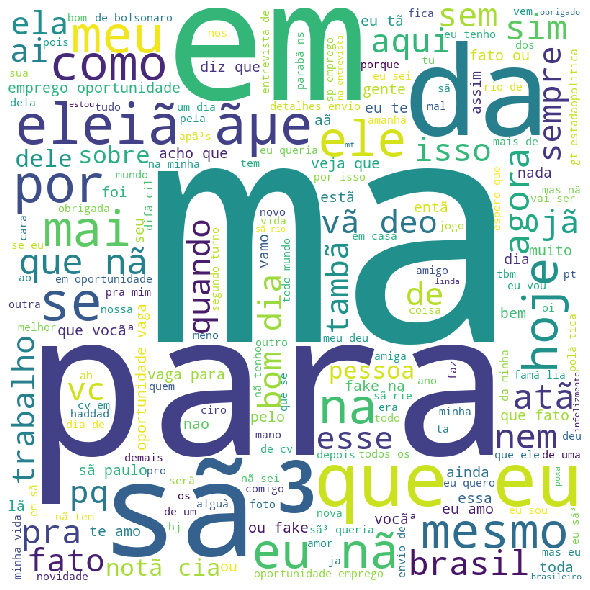

In [0]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 